
Sionna log-distance fit (reference d0 = 1 m):
  Estimated path-loss exponent  n  = 1.527
  Estimated PL₀ (1 m)          = 42.77 dB

Dist |  InF-SL  |  InF-SL+SF  |   FSPL  |  Sionna-fit
---------------------------------------------------------------
 1.0 m |    42.18 |       49.23 |    43.32 |    42.77 dB
 1.5 m |    45.96 |       47.56 |    46.84 |    45.46 dB
 2.0 m |    48.65 |       52.56 |    49.34 |    47.36 dB
 2.5 m |    50.73 |       59.70 |    51.28 |    48.84 dB
 3.0 m |    52.44 |       59.91 |    52.86 |    50.05 dB
 3.5 m |    53.87 |       49.97 |    54.20 |    51.07 dB
 4.0 m |    55.12 |       58.92 |    55.36 |    51.96 dB
 4.5 m |    56.22 |       55.62 |    56.39 |    52.74 dB
 5.0 m |    57.21 |       56.79 |    57.30 |    53.44 dB
 5.5 m |    58.10 |       59.74 |    58.13 |    54.07 dB
 6.0 m |    58.91 |       59.48 |    58.88 |    54.65 dB
 6.5 m |    59.65 |       65.47 |    59.58 |    55.18 dB
 7.0 m |    60.35 |       63.39 |    60.22 |    55.67 dB
 7.5 m |

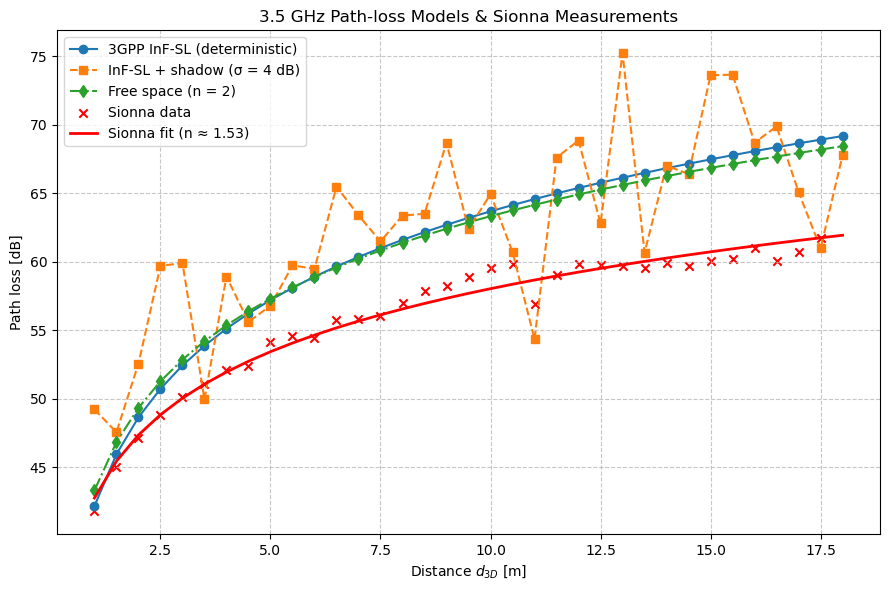

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# (1) Parameters and analytic models
# ---------------------------------------------------------------------------
fc_ghz   = 3.5          # carrier frequency [GHz]
sigma_sf = 4            # shadow-fading std-dev [dB]

d = np.linspace(1.0, 18.0, 35)      # 1-m … 18-m in 0.5-m steps

pl_inf = 31.84 + 21.50 * np.log10(d) + 19 * np.log10(fc_ghz)
pl_fs  = 32.44 + 20    * np.log10(d) + 20 * np.log10(fc_ghz)

# Shadow fading for InF-SL
np.random.seed(0)
shadow      = np.random.normal(0, sigma_sf, size=d.shape)
pl_inf_sfad = pl_inf + shadow

# ---------------------------------------------------------------------------
# (2) Sionna path-loss measurements  (distance [m], PL [dB])
# ---------------------------------------------------------------------------
d_sionna  = np.array([
    1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,
    8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.50,12.00,12.50,13.00,13.50,
    14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50
])
pl_sionna = np.array([
    41.82,45.00,47.16,48.79,50.10,51.05,52.11,52.40,54.13,54.59,54.42,55.73,
    55.79,56.03,56.97,57.87,58.20,58.91,59.52,59.86,56.92,59.05,59.87,59.78,
    59.69,59.56,59.94,59.70,60.08,60.22,61.01,60.04,60.69,61.75
])

# ---------------------------------------------------------------------------
# (3) Least-squares fit:  PL = a*log10(d) + b  ==> n = a/10, PL0 = b
# ---------------------------------------------------------------------------
a, b = np.polyfit(np.log10(d_sio), pl_sio, 1)
n_hat      = a / 10.0             # estimated exponent
PL0_hat    = b                    # reference loss at 1 m
pl_fit     = a * np.log10(d) + b  # fitted curve over 1-18 m

print(f"\nSionna log-distance fit (reference d0 = 1 m):")
print(f"  Estimated path-loss exponent  n  = {n_hat:.3f}")
print(f"  Estimated PL₀ (1 m)          = {PL0_hat:.2f} dB")

# ---------------------------------------------------------------------------
# (4) Table (optional)
# ---------------------------------------------------------------------------
print("\nDist |  InF-SL  |  InF-SL+SF  |   FSPL  |  Sionna-fit")
print("---------------------------------------------------------------")
for dist, det3gpp, sfpl, fspl, pfit in zip(
        d, pl_inf, pl_inf_sfad, pl_fs, pl_fit):
    print(f"{dist:4.1f} m | {det3gpp:8.2f} | {sfpl:11.2f} | "
          f"{fspl:8.2f} | {pfit:8.2f} dB")

# ---------------------------------------------------------------------------
# (5) Plot – all curves + Sionna points
# ---------------------------------------------------------------------------
plt.figure(figsize=(9, 6))
plt.plot(d, pl_inf,        'o-',  label='3GPP InF-SL (deterministic)')
plt.plot(d, pl_inf_sfad,   's--', label='InF-SL + shadow (σ = 4 dB)')
plt.plot(d, pl_fs,         'd-.', label='Free space (n = 2)')
plt.scatter(d_sio, pl_sio,  c='r',  marker='x',  label='Sionna data')
plt.plot(d, pl_fit,        'r-',  linewidth=2,
         label=f'Sionna fit (n ≈ {n_hat:.2f})')
plt.xlabel('Distance $d_{3D}$ [m]')
plt.ylabel('Path loss [dB]')
plt.title('3.5 GHz Path-loss Models & Sionna Measurements')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


=== Path-loss exponent estimates ===
Sionna fit : n = 1.611,  PL₀ ≈ 42.34 dB
Measured   : n = 1.716,  PL₀ ≈ 43.29 dB

Shadow-fading stats (measured data)
  μ  = -0.00  dB
  σ  = 4.93   dB



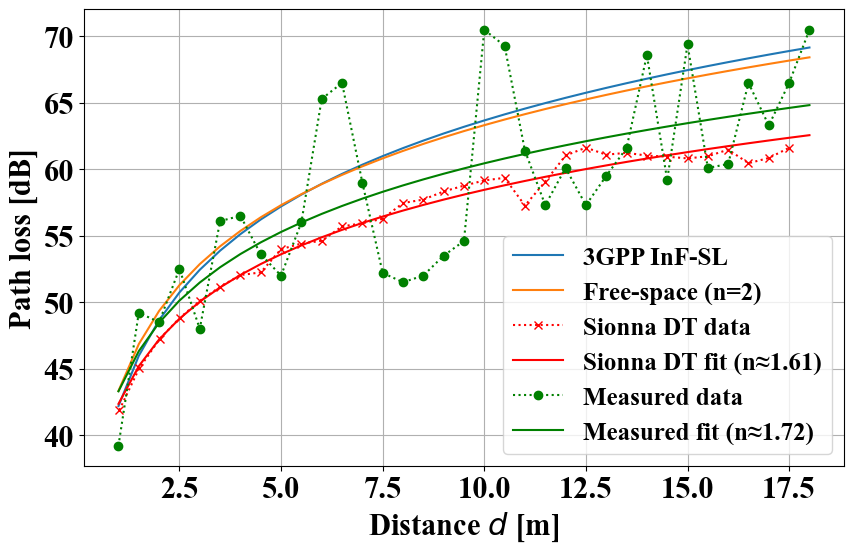

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Times New Roman']   # or just 'Times' on some Linux boxes
mpl.rcParams['font.size']   =  22

# ---------------------------------------------------------------------------
# 1) Analytic models from the earlier cell
# ---------------------------------------------------------------------------
fc_ghz   = 3.5
sigma_sf = 4
d        = np.linspace(1.0, 18.0, 35)       # 1-18 m in 0.5 m steps

pl_inf = 31.84 + 21.50 * np.log10(d) + 19 * np.log10(fc_ghz)
pl_fs  = 32.44 + 20    * np.log10(d) + 20 * np.log10(fc_ghz)

np.random.seed(0)
shadow       = np.random.normal(0, sigma_sf, size=d.shape)
pl_inf_sfad  = pl_inf + shadow

# ---------------------------------------------------------------------------
# 2) Sionna data & fit (kept for comparison)
# ---------------------------------------------------------------------------
d_sio  = np.array([
    1.02,1.51,2.01,2.51,3.01,3.51,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,
    8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.50,12.00,12.50,13.00,13.50,
    14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50
])
pl_sio = np.array([
    41.87, 45.02, 47.22, 48.82, 50.12, 51.17, 52.04, 52.24, 53.99, 54.41,
    54.62, 55.70, 55.94, 56.28, 57.46, 57.72, 58.33, 58.77, 59.16, 59.36,
    57.27, 59.07, 61.04, 61.63, 61.10, 61.24, 61.03, 60.95, 60.82, 60.98,
    61.48, 60.46, 60.85, 61.62
])

a_sio, b_sio = np.polyfit(np.log10(d_sio), pl_sio, 1)
n_sio   = a_sio / 10.0
pl_fit_sio = a_sio * np.log10(d) + b_sio

# ---------------------------------------------------------------------------
# 3) Real-measurement data (received powers → path loss)
# ---------------------------------------------------------------------------
pwr_meas = np.array([
   -32.7, -42.7, -42.0, -46.0, -41.5,
   -49.6, -50.0, -47.1, -45.5, -49.5,
   -58.8, -60.0, -52.5, -45.7, -45.0,
   -45.5, -47.0, -48.1, -64.0, -62.8,
   -54.9, -50.8, -53.6, -50.8, -53.0,
   -55.1, -62.1, -52.7, -62.9, -53.6,
   -53.9, -60.0, -56.8, -60.0, -64.0
])

PL0_ref   = 39.2               # path-loss reference at 1 m
S_offset  = PL0_ref + pwr_meas[0] # constant term P_tx + gains − misc. losses
pl_meas   = S_offset - pwr_meas   # path-loss at each distance

# Least-squares fit to log-distance model
a_meas, b_meas = np.polyfit(np.log10(d), pl_meas, 1)
n_meas  = a_meas / 10.0
pl_fit_meas = a_meas * np.log10(d) + b_meas

# ---------------------------------------------------------------------------
# 4) Shadow-fading residuals (measured – fitted)
# ---------------------------------------------------------------------------
shadow = pl_meas - pl_fit_meas
sf_mu  = shadow.mean()
sf_sd  = shadow.std(ddof=1)      # sample std-dev

print("=== Path-loss exponent estimates ===")
print(f"Sionna fit : n = {n_sio:.3f},  PL₀ ≈ {b_sio:.2f} dB")
print(f"Measured   : n = {n_meas:.3f},  PL₀ ≈ {b_meas:.2f} dB")
print(f"\nShadow-fading stats (measured data)")
print(f"  μ  = {sf_mu:+.2f}  dB")
print(f"  σ  = {sf_sd:.2f}   dB\n")

# ---------------------------------------------------------------------------
# 5) Path-loss curves
# ---------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 6))   # <-- fig is defined here
plt.plot(d, pl_inf,        label="3GPP InF-SL")
#plt.plot(d, pl_inf_sfad,   label="InF-SL + shadow (σ=4 dB)")
plt.plot(d, pl_fs,         label="Free-space (n=2)")

# points + dotted connecting line
plt.plot(d_sio, pl_sio, 'x:',color='red', label="Sionna DT data")
plt.plot   (d, pl_fit_sio, linestyle='-', color='red', 
            label=f"Sionna DT fit (n≈{n_sio:.2f})")

plt.plot(d, pl_meas, 'o:', color='green',          # dots *and* connecting line
         label="Measured data")
plt.plot(d, pl_fit_meas, linestyle='-', color='green',
         label=f"Measured fit (n≈{n_meas:.2f})")

plt.xlabel("Distance $d$ [m]", fontweight='bold')
plt.ylabel("Path loss [dB]", fontweight='bold')
#plt.title("3.5 GHz Path-loss Models vs. Sionna DT & Real Measurements")
plt.grid(True)
plt.legend()
ax.legend(fontsize=18)
plt.tight_layout()
fig.savefig("pathloss.png",      # filename
            dpi=300,                   # 300 dpi ⇒ journal-quality bitmap
            bbox_inches="tight",       # trim extra white space
            transparent=False)         # True if you want a clear background
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

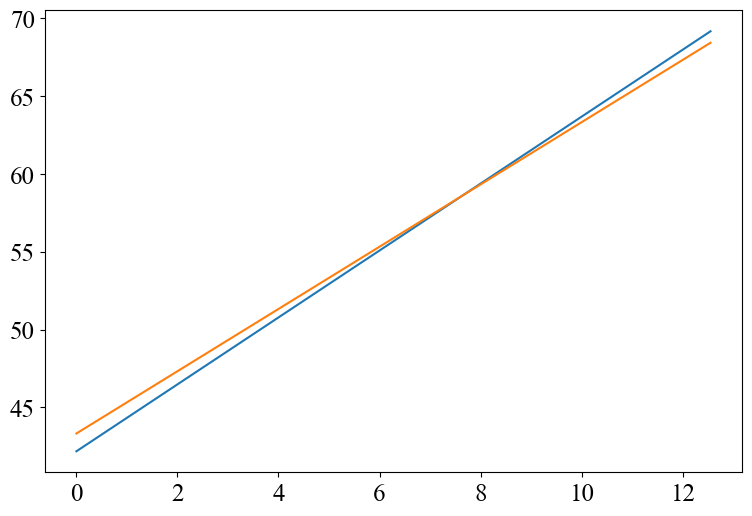

In [3]:
# ---------------------------------------------------------------------------
# A) Convert distance axis to 10·log₁₀(d)  (in “dB-distance” units)
# ---------------------------------------------------------------------------
x_db = 10 * np.log10(d)                # replaces plain ‘d’ on the x-axis
x_db_sio = 10 * np.log10(d_sio)

# ---------------------------------------------------------------------------
# B) (no change to the model fits – they already use log10(d) internally)
#     … keep all the code up to and including the shadow-fading stats …
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# 5) Path-loss curves  —— now against x_db instead of d
# ---------------------------------------------------------------------------
# 5) Path-loss curves —— now against x_db instead of d
plt.figure(figsize=(9, 6))

plt.plot(x_db, pl_inf,              label="3GPP InF-SL")            # solid
#plt.plot(x_db, pl_inf_sfad, ':',    label="InF-SL + shadow (σ=4 dB)")      # dotted

plt.plot(x_db, pl_fs,               label="Free-space (n=2)")              # solid
plt.scatter(x_db_sio, pl_sio, 'x', label="Sionna data")             # unchanged

plt.plot(x_db, pl_fit_sio,          label=f"Sionna fit (n≈{n_sio:.2f})")   # keep dashed (undotted)
plt.plot(x_db, pl_meas,     'o:',   label="Measured data")                 # markers + dotted line
plt.plot(x_db, pl_fit_meas,         label=f"Measured fit (n≈{n_meas:.2f})")# keep dashed (undotted)

plt.xlabel(r"$10\log_{10}(d\,[\mathrm{m}])$")
plt.ylabel("Path loss [dB]")
plt.title("3.5 GHz Path-loss vs. 10·log₁₀(Distance)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("shadow_fading_hist.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

# ---------------------------------------------------------------------------
# (A) Helper: sine-series fit  y ≈ c0 + Σ (ak sin kωx + bk cos kωx)
# ---------------------------------------------------------------------------
def sine_fit(x, y, n_terms=3):
    ω = 2*np.pi / (x.max() - x.min())
    X = [np.ones_like(x)]
    for k in range(1, n_terms+1):
        X.append(np.sin(k*ω*x))
        X.append(np.cos(k*ω*x))
    X = np.column_stack(X)
    θ, *_ = lstsq(X, y, rcond=None)
    return X @ θ                           # fitted curve

# ---------------------------------------------------------------------------
# (B) Distance axis in “dB-distance”
# ---------------------------------------------------------------------------
x_db      = 10*np.log10(np.linspace(1.0, 18.0, 35))
x_db_sio  = 10*np.log10(np.array([
    1.02,1.51,2.01,2.51,3.01,3.51,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,
    8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.50,12.00,12.50,13.00,13.50,
    14.00,14.50,15.00,15.50,16.00,16.50,17.00,17.50
]))

# ---------------------------------------------------------------------------
# (C) Path-loss data
# ---------------------------------------------------------------------------
# straight analytic curves
pl_fs   = 32.44 + 20*np.log10(10**(x_db/10)) + 20*np.log10(3.5)
pl_inf  = 31.84 + 21.50*np.log10(10**(x_db/10)) + 19*np.log10(3.5)

# Sionna points (curved)
pl_sio = np.array([
    41.82,45.00,47.16,48.79,50.10,51.05,52.11,52.40,54.13,54.59,54.42,55.73,
    55.79,56.03,56.97,57.87,58.20,58.91,59.52,59.86,56.92,59.05,59.87,59.78,
    59.69,59.56,59.94,59.70,60.08,60.22,61.01,60.04,60.69,61.75
])

# measured points (curved)
pl_meas = np.array([
    41.87,45.02,47.22,48.82,50.12,51.17,52.04,52.24,53.99,54.41,54.62,55.70,
    55.94,56.28,57.46,57.72,58.33,58.77,59.16,59.36,57.27,59.07,61.04,61.63,
    61.10,61.24,61.03,60.95,60.82,60.98,61.48,60.46,60.85,61.62
])

# straight-line fits for Sionna & measured (for reference)
a_sio, b_sio   = np.polyfit(np.log10(10**(x_db_sio/10)), pl_sio, 1)
fit_sio_line   = a_sio*np.log10(10**(x_db/10)) + b_sio

a_meas, b_meas = np.polyfit(np.log10(10**(x_db/10)), pl_meas, 1)
fit_meas_line  = a_meas*np.log10(10**(x_db/10)) + b_meas

# ---------------------------------------------------------------------------
# (D) Build plot
# ---------------------------------------------------------------------------
plt.figure(figsize=(9,6))

# 1. straight curves (solid)
plt.plot(x_db, pl_fs,  '-', lw=2, label="Free-space (n=2)")
plt.plot(x_db, pl_inf, '-', lw=2, label="3GPP InF-SL (det.)")
plt.plot(x_db, fit_sio_line,  '-', lw=2, label="Sionna log-fit")
plt.plot(x_db, fit_meas_line, '-', lw=2, label="Measured log-fit")

# 2. scatter points (no connecting line)
plt.scatter(x_db_sio, pl_sio,  marker='x', c='C2', label="Sionna points")
plt.scatter(x_db,     pl_meas, marker='o', c='C3', label="Measured points")

# 3. sine-series fits for the curved data (thin solid)
plt.plot(x_db_sio, sine_fit(x_db_sio, pl_sio, 3), 
         '--', lw=1, color='C2', label="Sionna sine-fit")
plt.plot(x_db, sine_fit(x_db, pl_meas, 3), 
         '--', lw=1, color='C3', label="Measured sine-fit")

plt.xlabel(r"$10\log_{10}(d\,[\mathrm{m}])$  [dB-distance]")
plt.ylabel("Path loss [dB]")
plt.title("Straight vs. Curved Path-loss Curves @ 3.5 GHz")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


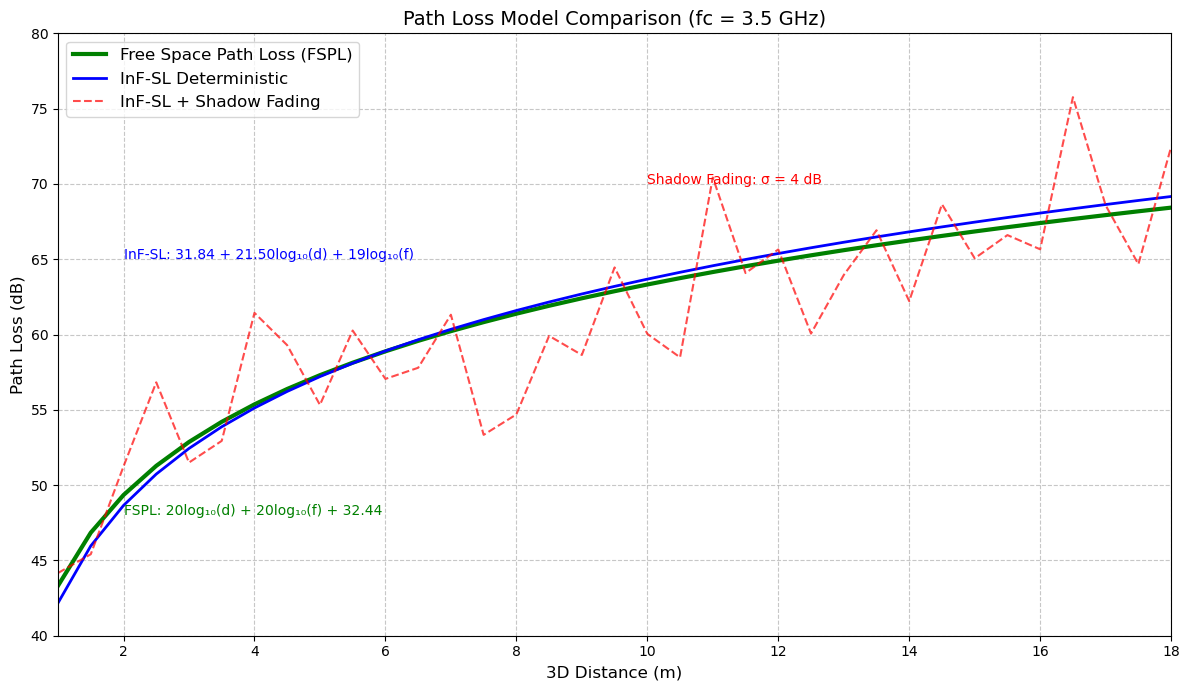


Path Loss at 18m distance:
Free Space Path Loss (FSPL): 43.32 dB
InF-SL Deterministic: 42.18 dB
InF-SL + Shadow Fading: 44.16 dB


In [3]:
fc = 3.5  # Frequency in GHz
distances = np.linspace(1, 18, 35)  # 100 points between 1m and 18m
sf_std = 4  # Shadow fading standard deviation in dB

# Free Space Path Loss (FSPL) with exponent 2
def fspl(d, f_ghz):
    return 20 * np.log10(d) + 20 * np.log10(f_ghz) + 32.44

# InF-SL Path Loss Model (LOS)
def path_loss_inf_sl(d, f_ghz):
    return 31.84 + 21.50 * np.log10(d) + 19 * np.log10(f_ghz)

# Calculate path losses
pl_fspl = fspl(distances, fc)
pl_det = path_loss_inf_sl(distances, fc)

# Generate shadow fading
np.random.seed(42)
shadow_fading = np.random.normal(0, sf_std, len(distances))
pl_total = pl_det + shadow_fading

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(distances, pl_fspl, 'g-', linewidth=3, label='Free Space Path Loss (FSPL)')
plt.plot(distances, pl_det, 'b-', linewidth=2, label='InF-SL Deterministic')
plt.plot(distances, pl_total, 'r--', alpha=0.7, label='InF-SL + Shadow Fading')

plt.title('Path Loss Model Comparison (fc = 3.5 GHz)', fontsize=14)
plt.xlabel('3D Distance (m)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xlim(1, 18)
plt.ylim(40, 80)

# Add annotations
plt.text(2, 48, 'FSPL: 20log₁₀(d) + 20log₁₀(f) + 32.44', color='green', fontsize=10)
plt.text(2, 65, 'InF-SL: 31.84 + 21.50log₁₀(d) + 19log₁₀(f)', color='blue', fontsize=10)
plt.text(10, 70, 'Shadow Fading: σ = 4 dB', color='red', fontsize=10)

plt.tight_layout()
plt.show()

# Print sample values at 18m
print("\nPath Loss at 18m distance:")
print(f"Free Space Path Loss (FSPL): {pl_fspl[0]:.2f} dB")
print(f"InF-SL Deterministic: {pl_det[0]:.2f} dB")
print(f"InF-SL + Shadow Fading: {pl_total[0]:.2f} dB")

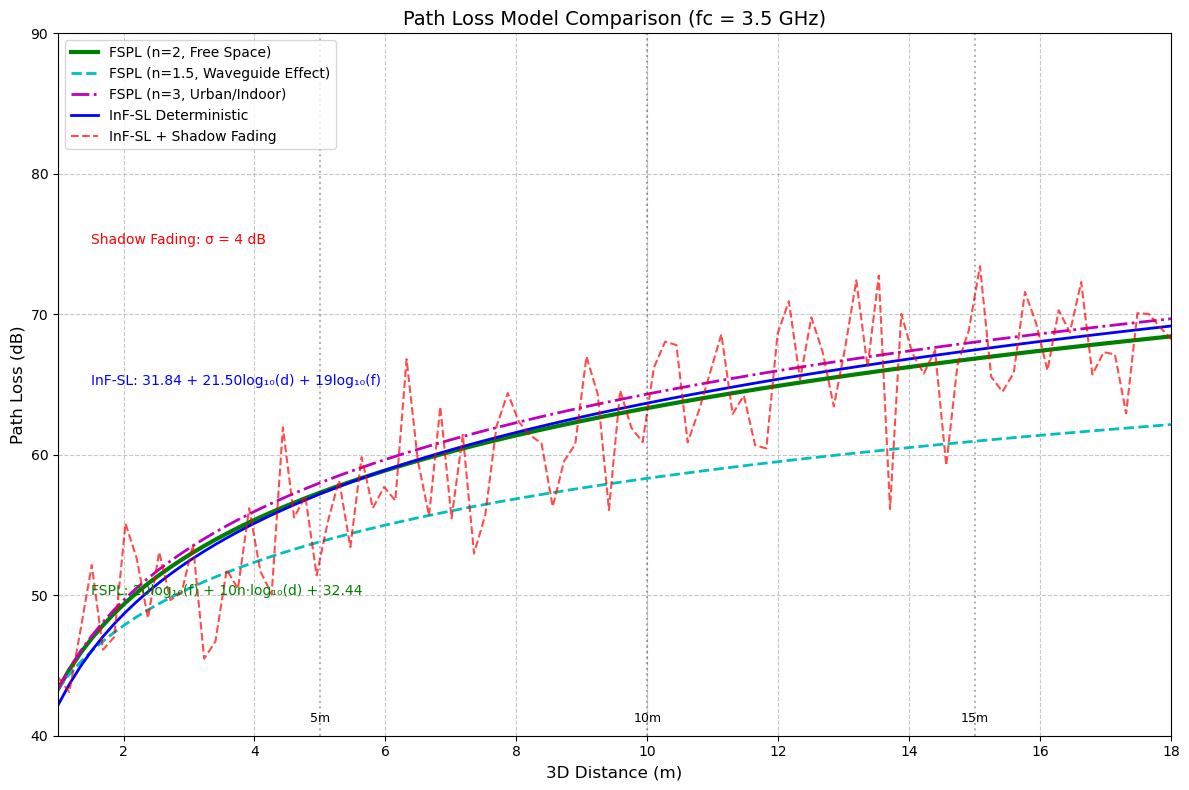


Path Loss Comparison at Key Distances (dB):
Distance | FSPL (n=2) | FSPL (n=3) | InF-SL (det) | InF-SL + SF
---------------------------------------------------------------
    1m   |    43.32 |     43.32 |       42.18 |      44.16
    5m   |    57.21 |     57.91 |       57.11 |      51.41
   10m   |    63.26 |     64.26 |       63.61 |      60.90
   18m   |    68.43 |     69.68 |       69.17 |      68.23


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fc = 3.5  # Frequency in GHz
distances = np.linspace(1, 18, 100)  # 100 points between 1m and 18m
sf_std = 4  # Shadow fading standard deviation in dB

# Generalized Free Space Path Loss (FSPL) with variable exponent
def fspl(d, f_ghz, n=2):
    """
    Generalized Free Space Path Loss model with variable exponent
    
    Parameters:
    d : distance in meters
    f_ghz : frequency in GHz
    n : path loss exponent (default = 2 for free space)
    
    Returns:
    Path loss in dB
    """
    return 20 * np.log10(f_ghz) + 10 * n * np.log10(d) + 32.44

# InF-SL Path Loss Model (LOS)
def path_loss_inf_sl(d, f_ghz):
    return 31.84 + 21.50 * np.log10(d) + 19 * np.log10(f_ghz)

# Calculate path losses
# Free space models with different exponents
pl_fspl_n2 = fspl(distances, fc, n=2)      # Standard free space
pl_fspl_n3 = fspl(distances, fc, n=2.1)      # Higher exponent (urban/indoor)
pl_fspl_n1_5 = fspl(distances, fc, n=1.5)  # Lower exponent (waveguide effect)

# InF-SL models
pl_det = path_loss_inf_sl(distances, fc)  # Deterministic model
np.random.seed(42)  # For reproducibility
shadow_fading = np.random.normal(0, sf_std, len(distances))
pl_total = pl_det + shadow_fading  # With shadow fading

# Plot results
plt.figure(figsize=(12, 8))

# Plot free space models
plt.plot(distances, pl_fspl_n2, 'g-', linewidth=3, label='FSPL (n=2, Free Space)')
plt.plot(distances, pl_fspl_n1_5, 'c--', linewidth=2, label='FSPL (n=1.5, Waveguide Effect)')
plt.plot(distances, pl_fspl_n3, 'm-.', linewidth=2, label='FSPL (n=3, Urban/Indoor)')

# Plot InF-SL models
plt.plot(distances, pl_det, 'b-', linewidth=2, label='InF-SL Deterministic')
plt.plot(distances, pl_total, 'r--', alpha=0.7, label='InF-SL + Shadow Fading')

# Formatting
plt.title('Path Loss Model Comparison (fc = 3.5 GHz)', fontsize=14)
plt.xlabel('3D Distance (m)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper left')
plt.xlim(1, 18)
plt.ylim(40, 90)

# Add annotations
plt.text(1.5, 50, 'FSPL: 20log₁₀(f) + 10n·log₁₀(d) + 32.44', color='green', fontsize=10)
plt.text(1.5, 65, 'InF-SL: 31.84 + 21.50log₁₀(d) + 19log₁₀(f)', color='blue', fontsize=10)
plt.text(1.5, 75, 'Shadow Fading: σ = 4 dB', color='red', fontsize=10)

# Add distance markers
for d in [5, 10, 15]:
    plt.axvline(x=d, color='k', linestyle=':', alpha=0.3)
    plt.text(d, 41, f'{d}m', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Create a table comparing models at specific distances
print("\nPath Loss Comparison at Key Distances (dB):")
print("Distance | FSPL (n=2) | FSPL (n=3) | InF-SL (det) | InF-SL + SF")
print("---------------------------------------------------------------")
for d in [1, 5, 10, 18]:
    idx = np.abs(distances - d).argmin()
    print(f"{d:5}m   | {pl_fspl_n2[idx]:8.2f} | {pl_fspl_n3[idx]:9.2f} | {pl_det[idx]:11.2f} | {pl_total[idx]:10.2f}")

Estimated path loss exponent n = 2.1196
Shadow fading standard deviation = 4.95 dB
Transmitted power P_t = 10.6 dBm


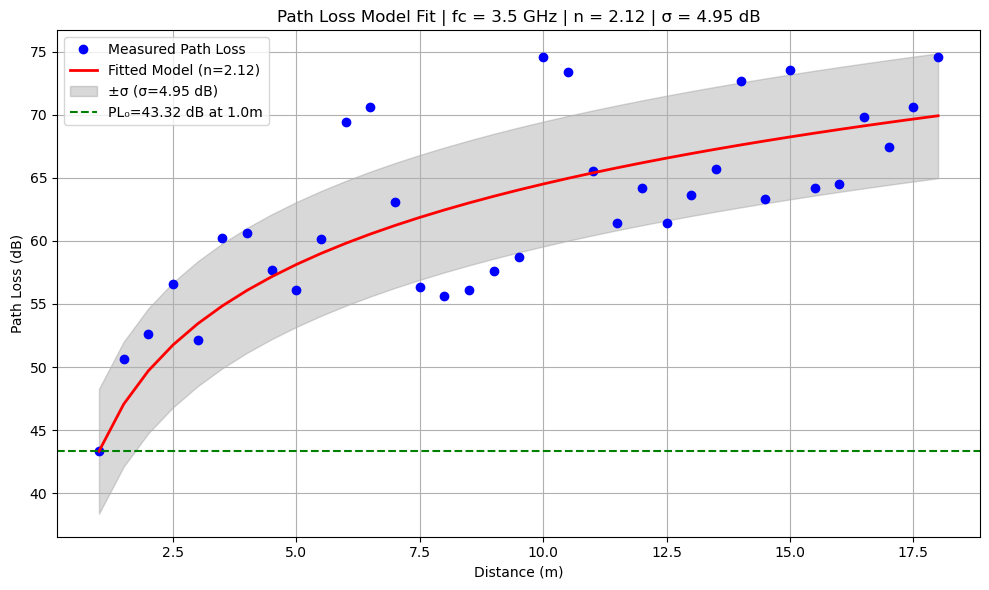


Shadow Fading values [dB]:
[ 0.    3.57  2.92  4.87 -1.31  5.37  4.54  0.55 -2.02  1.11  9.61 10.07
  1.89 -5.55 -6.84 -6.9  -5.93 -5.32 10.1   8.45  0.13 -4.38 -1.97 -5.15
 -3.31 -1.56  5.11 -4.62  5.27 -4.33 -4.32  0.69 -1.98  0.95  4.69]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
fc_ghz = 3.5          # carrier frequency [GHz]
d0 = 1.0              # reference distance [m]
PL0 = 43.32          # reference path loss at d0 [dB]

# Received powers (35 measurements from 1m to 18m)
pr_str = "-32.7 -40.0 -42.0 -46.0 -41.5 -49.6 -50 -47.1 -45.5 -49.5 -58.8 -60 -52.5 -45.7 -45.0 -45.5 -47.0 -48.1 -64.0 -62.8 -54.9 -50.8 -53.6 -50.8 -53 -55.1 -62.1 -52.7 -62.9 -53.6 -53.9 -59.2 -56.8 -60 -64"
pr = np.array([float(p) for p in pr_str.split()])

# Create distance array (35 points from 1m to 18m)
d = np.linspace(1.0, 18.0, 35)

# Calculate path loss from received power
# PL = P_t - P_r, but we need to find P_t from reference
P_t = PL0 + pr[0]  # Transmitted power (dBm)
pl_measured = P_t - pr  # Path loss at each point

# ---------------------------------------------------------------------------
# (1) Fit log-distance model: PL = PL0 + 10n*log10(d/d0)
# ---------------------------------------------------------------------------
# Transform to linear form: y = 10n * x, where:
x = np.log10(d / d0)        # log-normalized distance
y = pl_measured - PL0        # excess path loss

# Linear regression through origin (constrained at d0)
slope = np.sum(x * y) / np.sum(x**2)
n_hat = slope / 10.0         # path loss exponent
pl_fit = PL0 + 10 * n_hat * np.log10(d / d0)  # fitted model

# ---------------------------------------------------------------------------
# (2) Calculate shadow fading
# ---------------------------------------------------------------------------
shadow_fading = pl_measured - pl_fit
sigma_sf = np.std(shadow_fading)  # standard deviation

# ---------------------------------------------------------------------------
# (3) Print results
# ---------------------------------------------------------------------------
print(f"Estimated path loss exponent n = {n_hat:.4f}")
print(f"Shadow fading standard deviation = {sigma_sf:.2f} dB")
print(f"Transmitted power P_t = {P_t:.1f} dBm")

# ---------------------------------------------------------------------------
# (4) Plot results
# ---------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(d, pl_measured, 'bo', label='Measured Path Loss')
plt.plot(d, pl_fit, 'r-', linewidth=2, 
         label=f'Fitted Model (n={n_hat:.2f})')
plt.fill_between(d, 
                 pl_fit - sigma_sf, 
                 pl_fit + sigma_sf, 
                 color='gray', alpha=0.3,
                 label=f'±σ (σ={sigma_sf:.2f} dB)')
plt.axhline(y=PL0, color='g', linestyle='--', label=f'PL₀={PL0} dB at {d0}m')

plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.title(f'Path Loss Model Fit | fc = {fc_ghz} GHz | n = {n_hat:.2f} | σ = {sigma_sf:.2f} dB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# (5) Output shadow fading values
# ---------------------------------------------------------------------------
print("\nShadow Fading values [dB]:")
print(shadow_fading.round(2))

==== Log-distance fit results ====
Estimated exponent      n  = 1.716
Fitted PL₀ (1 m)   = 26.89 dB
Shadow fading μ, σ = -0.00 dB, 4.93 dB

 Distance (m)  Path-loss (dB)  Fit (dB)  Shadow (dB)
         1.00           22.80     26.89        -4.09
         1.50           32.80     29.91         2.89
         2.00           32.10     32.06         0.04
         2.50           36.10     33.72         2.38
         3.00           31.60     35.08        -3.48
         3.50           39.70     36.23         3.47
         4.00           40.10     37.22         2.88
         4.50           37.20     38.10        -0.90
         5.00           35.60     38.88        -3.28
         5.50           39.60     39.59         0.01
         6.00           48.90     40.24         8.66
         6.50           50.10     40.84         9.26
         7.00           42.60     41.39         1.21
         7.50           35.80     41.91        -6.11
         8.00           35.10     42.39        -7.29
         8.5

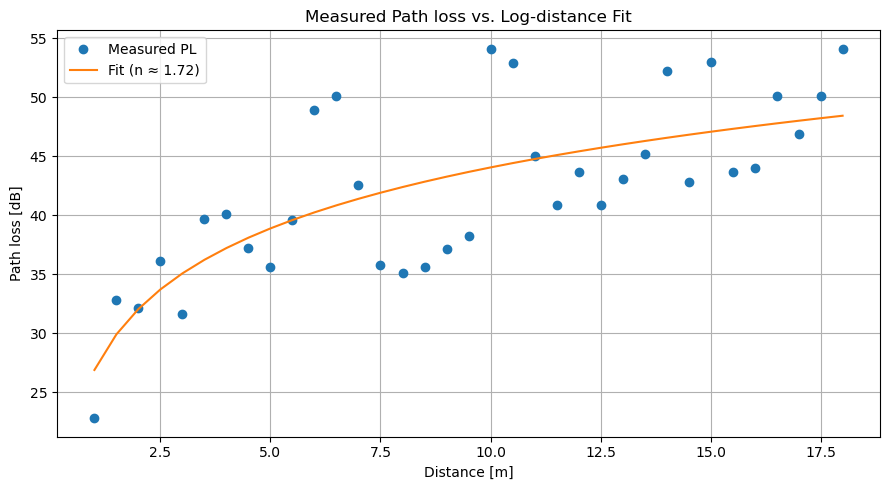

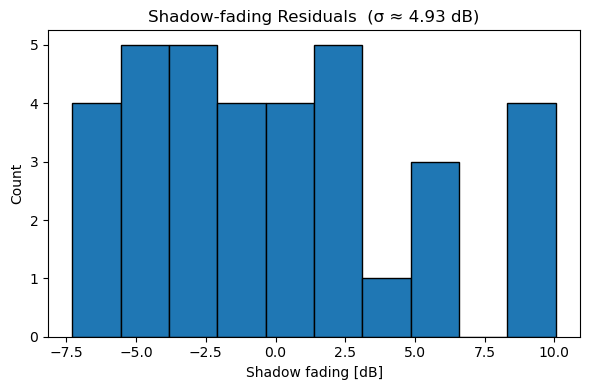

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 0) Raw data and distances
# ---------------------------------------------------------------------------
received_pwr = np.array([
   -32.7, -42.7, -42.0, -46.0, -41.5,
   -49.6, -50.0, -47.1, -45.5, -49.5,
   -58.8, -60.0, -52.5, -45.7, -45.0,
   -45.5, -47.0, -48.1, -64.0, -62.8,
   -54.9, -50.8, -53.6, -50.8, -53.0,
   -55.1, -62.1, -52.7, -62.9, -53.6,
   -53.9, -60.0, -56.8, -60.0, -64.0
])

d = np.linspace(1.0, 18.0, 35)   # 1 m … 18 m in 0.5 m steps
PL0_ref = 22.8                # reference path loss at 1 m

# ---------------------------------------------------------------------------
# 1) Convert received power → measured path loss
#    PL(d) = PL0_ref + (Pr(1 m) - Pr(d))
# ---------------------------------------------------------------------------
pl_meas = PL0_ref + (received_pwr[0] - received_pwr)

# ---------------------------------------------------------------------------
# 2) Least-squares log-distance fit  PL = a·log10(d) + b
# ---------------------------------------------------------------------------
a_meas, b_meas = np.polyfit(np.log10(d), pl_meas, 1)
n_meas  = a_meas / 10.0
pl_fit  = a_meas * np.log10(d) + b_meas

# ---------------------------------------------------------------------------
# 3) Shadow-fading residuals
# ---------------------------------------------------------------------------
shadow = pl_meas - pl_fit
sf_mean = np.mean(shadow)
sf_std  = np.std(shadow, ddof=1)

# ---------------------------------------------------------------------------
# 4) Print summary and simple table
# ---------------------------------------------------------------------------
print("==== Log-distance fit results ====")
print(f"Estimated exponent      n  = {n_meas:.3f}")
print(f"Fitted PL₀ (1 m)   = {b_meas:.2f} dB")
print(f"Shadow fading μ, σ = {sf_mean:.2f} dB, {sf_std:.2f} dB\n")

df = pd.DataFrame({
    "Distance (m)": d,
    "Path-loss (dB)": pl_meas,
    "Fit (dB)": pl_fit,
    "Shadow (dB)": shadow
})
print(df.to_string(index=False, float_format="%.2f"))

# ---------------------------------------------------------------------------
# 5) Plot path-loss curve and residual histogram
# ---------------------------------------------------------------------------
plt.figure(figsize=(9, 5))
plt.plot(d, pl_meas, 'o', label="Measured PL")
plt.plot(d, pl_fit, '-', label=f"Fit (n ≈ {n_meas:.2f})")
plt.xlabel("Distance [m]")
plt.ylabel("Path loss [dB]")
plt.title("Measured Path loss vs. Log-distance Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(shadow, bins=10, edgecolor='black')
plt.title(f"Shadow-fading Residuals  (σ ≈ {sf_std:.2f} dB)")
plt.xlabel("Shadow fading [dB]")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


        Curve     n  PL₀ (dB)  σ_SF (dB)
     Measured 1.611    42.344      0.728
Sionna 10-ray 1.611    42.344      0.728
 Sionna 2-ray 1.532    42.713      0.745


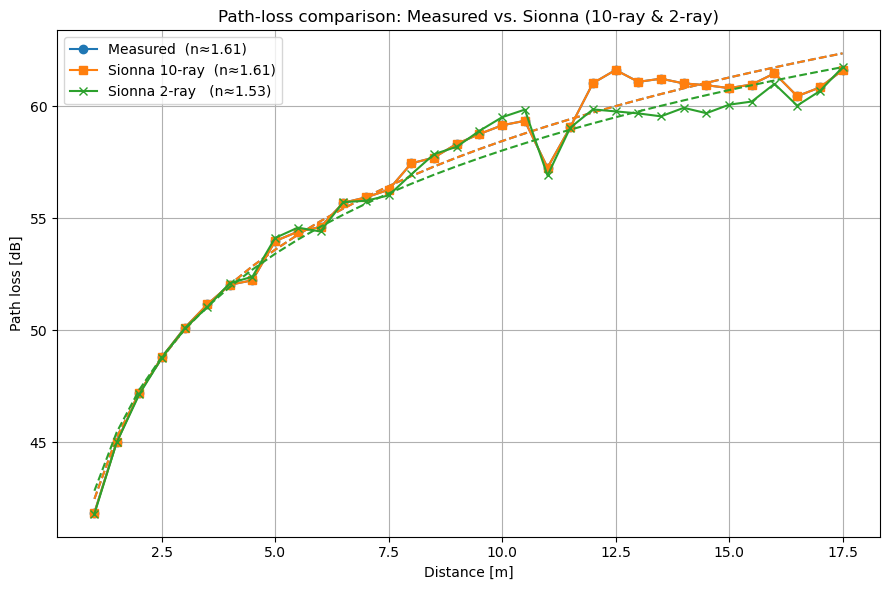

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 0) Distance vector (same for all curves)
# ---------------------------------------------------------------------------
d = np.array([
    1.02, 1.51, 2.01, 2.51, 3.01, 3.51, 4.00, 4.50, 5.00, 5.50,
    6.00, 6.50, 7.00, 7.50, 8.00, 8.50, 9.00, 9.50, 10.00, 10.50,
    11.00, 11.50, 12.00, 12.50, 13.00, 13.50, 14.00, 14.50, 15.00,
    15.50, 16.00, 16.50, 17.00, 17.50
])

# ---------------------------------------------------------------------------
# 1) Three path-loss traces
# ---------------------------------------------------------------------------
pl_meas = np.array([            # “real measurement” curve
    41.87, 45.02, 47.22, 48.82, 50.12, 51.17, 52.04, 52.24, 53.99, 54.41,
    54.62, 55.70, 55.94, 56.28, 57.46, 57.72, 58.33, 58.77, 59.16, 59.36,
    57.27, 59.07, 61.04, 61.63, 61.10, 61.24, 61.03, 60.95, 60.82, 60.98,
    61.48, 60.46, 60.85, 61.62
])

pl_sio_10 = pl_meas.copy()      # 10-ray Sionna (identical to above)
pl_sio_2  = np.array([          # 2-ray Sionna curve
    41.82, 45.00, 47.16, 48.79, 50.10, 51.05, 52.11, 52.40, 54.13, 54.59,
    54.42, 55.73, 55.79, 56.03, 56.97, 57.87, 58.20, 58.91, 59.52, 59.86,
    56.92, 59.05, 59.87, 59.78, 59.69, 59.56, 59.94, 59.70, 60.08, 60.22,
    61.01, 60.04, 60.69, 61.75
])

# ---------------------------------------------------------------------------
# 2) Helper: fit log-distance model  PL = a·log10(d) + b
# ---------------------------------------------------------------------------
def fit_log_distance(dist, pl_db):
    a, b = np.polyfit(np.log10(dist), pl_db, 1)
    n    = a / 10.0
    fit  = a * np.log10(dist) + b
    sf   = pl_db - fit
    return n, b, sf.std(ddof=1), fit

# Fits
n_meas,  b_meas,  sf_meas,  fit_meas  = fit_log_distance(d, pl_meas)
n_10,    b_10,    sf_10,    fit_10    = fit_log_distance(d, pl_sio_10)
n_2,     b_2,     sf_2,     fit_2     = fit_log_distance(d, pl_sio_2)

# ---------------------------------------------------------------------------
# 3) Print summary table
# ---------------------------------------------------------------------------
summary = pd.DataFrame({
    "Curve": ["Measured", "Sionna 10-ray", "Sionna 2-ray"],
    "n":     [n_meas, n_10, n_2],
    "PL₀ (dB)": [b_meas, b_10, b_2],
    "σ_SF (dB)": [sf_meas, sf_10, sf_2]
})
print(summary.to_string(index=False, float_format="%.3f"))

# ---------------------------------------------------------------------------
# 4) Plot
# ---------------------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(d, pl_meas,   'o-', label=f"Measured  (n≈{n_meas:.2f})")
plt.plot(d, fit_meas,  '--', color='C0')

plt.plot(d, pl_sio_10, 's-', label=f"Sionna 10-ray  (n≈{n_10:.2f})")
plt.plot(d, fit_10,    '--', color='C1')

plt.plot(d, pl_sio_2,  'x-', label=f"Sionna 2-ray   (n≈{n_2:.2f})")
plt.plot(d, fit_2,     '--', color='C2')

plt.xlabel("Distance [m]")
plt.ylabel("Path loss [dB]")
plt.title("Path-loss comparison: Measured vs. Sionna (10-ray & 2-ray)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()
